# ________________________________________________________________________________________________________________________________Amit Graduation Project_______________________________________________________________________________________________________________________________

# This Dataset is ECG Hearbeat categorization. I chose this project becausse my first encounter with MachineLearning was with a very basic dataset about heart arrhythmia. I found this a good opportunity to test all the skills i've learned through out the course and see how much difference between before and after the diploma. Let's go through this data and see what can we learn from it

# Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

###dfdfd


In [2]:
data_1 = pd.read_csv('ptbdb_normal.csv')
data_2 = pd.read_csv('ptbdb_abnormal.csv')
#The data was divided to train and test, but for the EDA we will merge them together first

In [3]:
data_1.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_2.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Data is not labelled so we will label Normal cases with 0 and Abnormal cases with 1, for this procedure we will need to make a loop and append to another column that we will add later

#y = []

#for i in range(len(data_1.index)):
 #   y.append(0)

#Lets do the same for Abnormal cases

#for i in range(len(data_2.index)):
   # y.append(1)

In [6]:
#Merge the data together, but remove the header first because each contain different headers
data_1 = pd.read_csv('ptbdb_normal.csv', header = None)
data_2 = pd.read_csv('ptbdb_abnormal.csv', header = None)
data =  pd.concat([data_1,data_2])


In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
#Add the label to the merged dataframes
#data['Label'] = y

In [9]:
#data['Label'] #Now we have a label for each case

In [10]:
#check if there are duplicates
data.duplicated().sum() #There are 7 duplicates

#drop the duplciates
data.drop_duplicates(inplace = True)

data.duplicated().sum()

0

In [11]:
#Check number of nulls
data.isna().values.sum() 

0

In [12]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,...,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.000000,14545.0,14545.000000
mean,0.976653,0.721557,0.402995,0.242797,0.207125,0.216400,0.221714,0.224460,0.227329,0.229686,...,0.001190,0.001134,0.000900,0.000740,0.000661,0.000475,0.000177,0.000185,0.0,0.721898
std,0.034492,0.195670,0.249764,0.249458,0.218014,0.192371,0.180723,0.176934,0.176668,0.176574,...,0.021366,0.021017,0.017320,0.014644,0.014036,0.012292,0.006546,0.006837,0.0,0.448080
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959384,0.584416,0.212267,0.052265,0.061875,0.090494,0.096449,0.097091,0.097222,0.097118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.177340,0.180328,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881134,0.557580,0.335885,0.264039,0.264544,0.286377,0.302251,0.311659,0.325280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [13]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# EDA

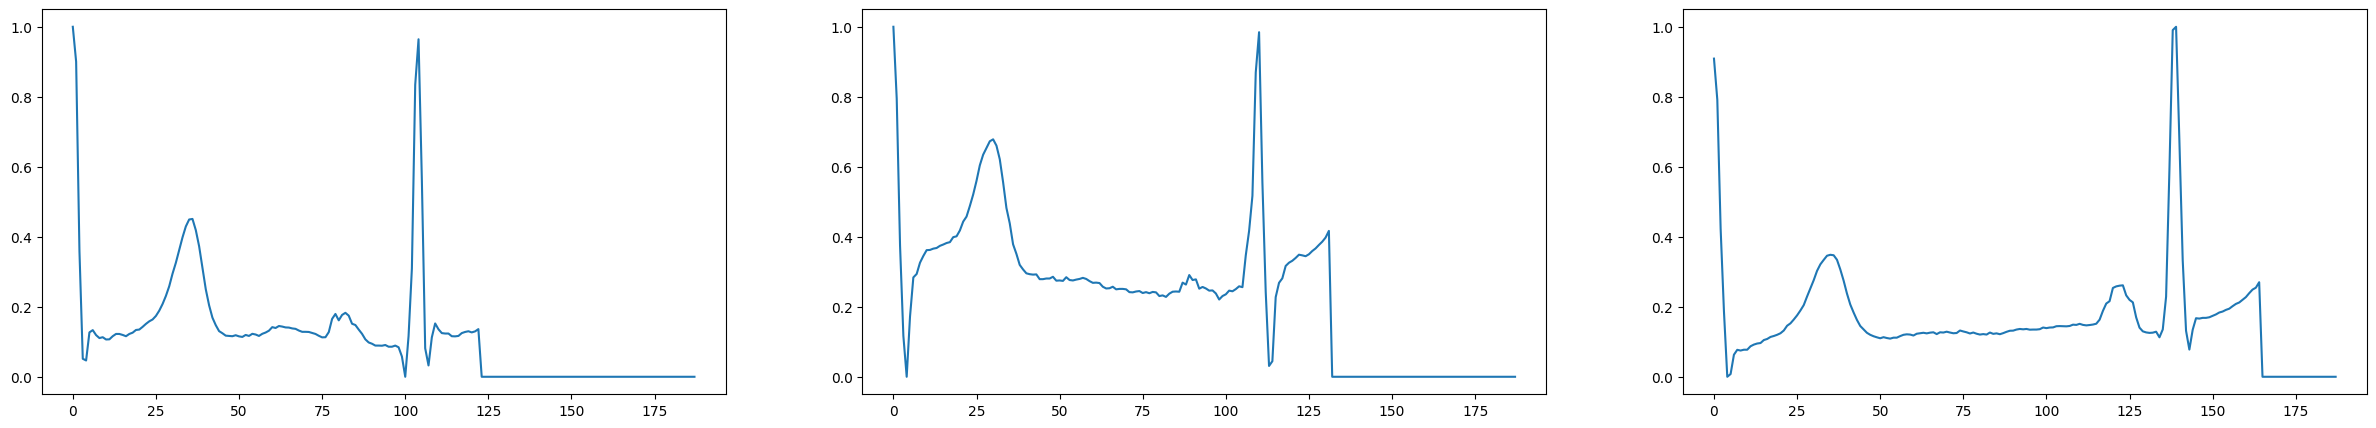

In [15]:
#Lets check the difference between a normal Signal and an abnormal Signal

plt.subplots(1,3,figsize = (30,5))
plt.subplot(1,3,1)
plt.plot(data_1.iloc[0])
plt.subplot(1,3,2)
plt.plot(data_1.iloc[1])
plt.subplot(1,3,3)
plt.plot(data_1.iloc[2])


#These are examples of 3 different Normal ECG signal

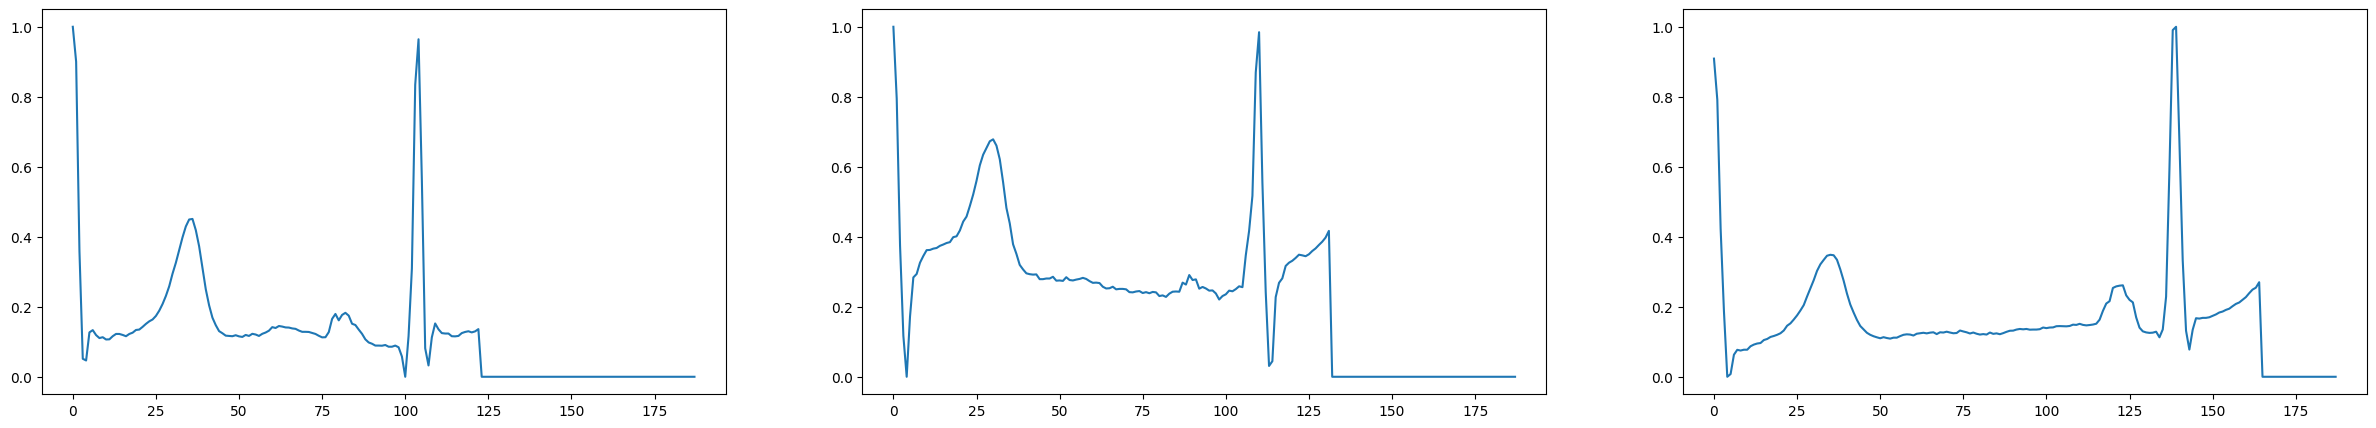

In [16]:
#Lets check the difference between a normal Signal and an abnormal Signal

plt.subplots(1,3,figsize = (30,5))
plt.subplot(1,3,1)
plt.plot(data_1.iloc[0])
plt.subplot(1,3,2)
plt.plot(data_1.iloc[1])
plt.subplot(1,3,3)
plt.plot(data_1.iloc[2])


#These are examples of 3 different Normal ECG signal

In [17]:
data_1.iloc[0].head()

0    1.000000
1    0.900324
2    0.358590
3    0.051459
4    0.046596
Name: 0, dtype: float64

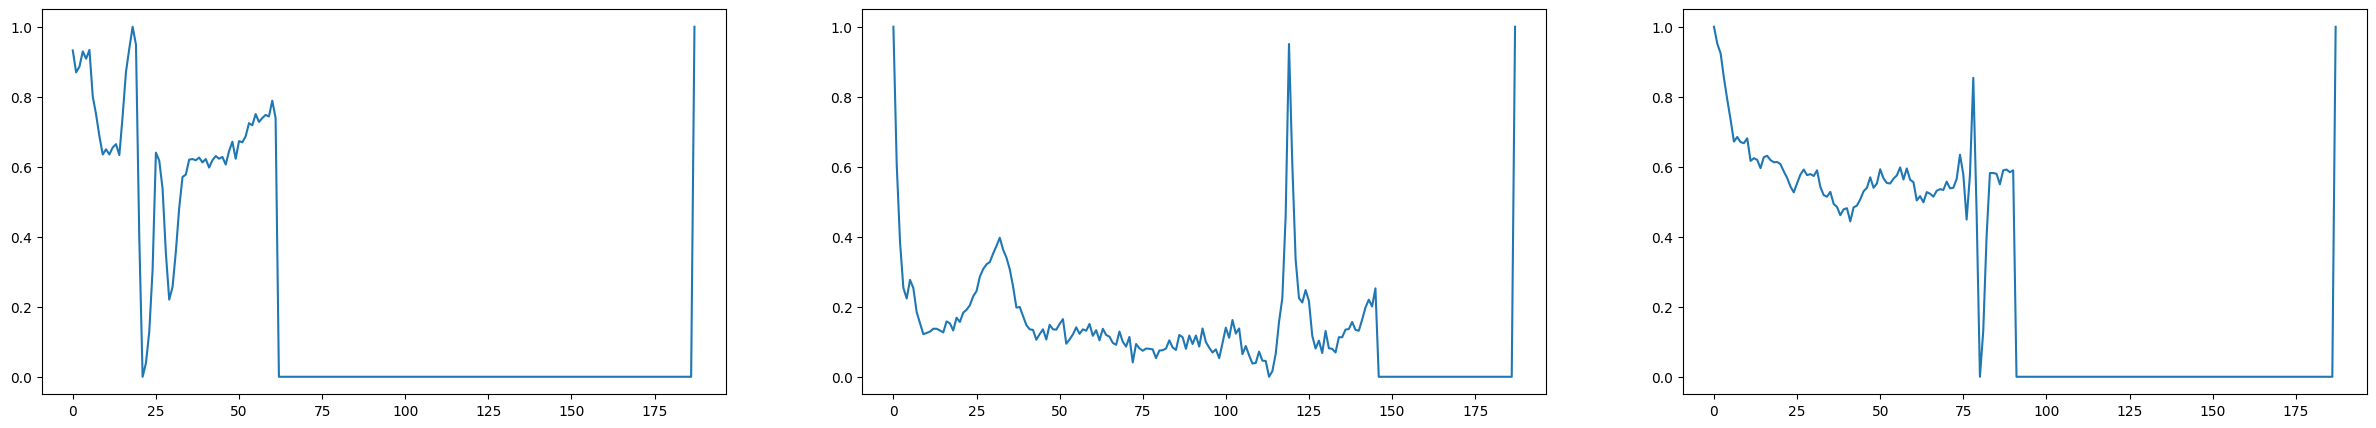

In [18]:
plt.subplots(1,3,figsize = (30,5))
plt.subplot(1,3,1)
plt.plot(data_2.iloc[0])
plt.subplot(1,3,2)
plt.plot(data_2.iloc[1])
plt.subplot(1,3,3)
plt.plot(data_2.iloc[2])

#These are 3 different examples of Abnormal cases, Have you spotted the difference between the 2 cases yet?, lets put them next to each other

Text(0.5, 1.0, 'Abnormal case')

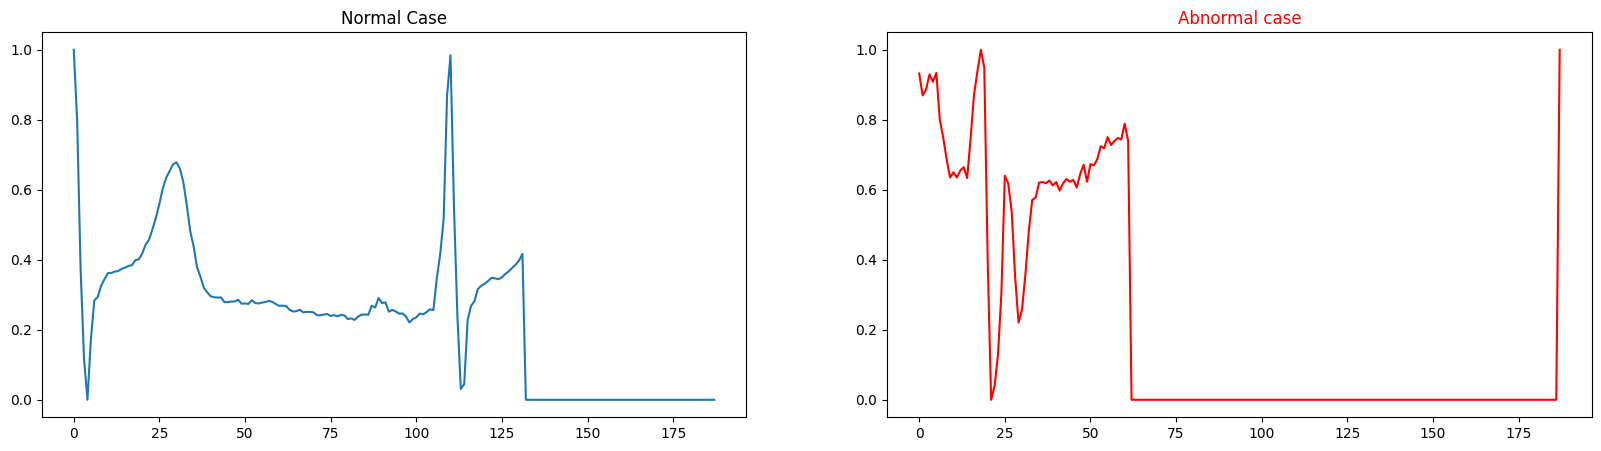

In [19]:
plt.subplots(1,2,figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(data_1.iloc[1])
plt.title('Normal Case',)

plt.subplot(1,2,2)
plt.plot(data_2.iloc[0], color = 'r')
plt.title('Abnormal case', color = 'red')

#As you can see, in the normal case, there are minimal jumps in the ECG signal, while in abnormal case the measured signal has a huge disorder and jumps which is a case called arrhythmia


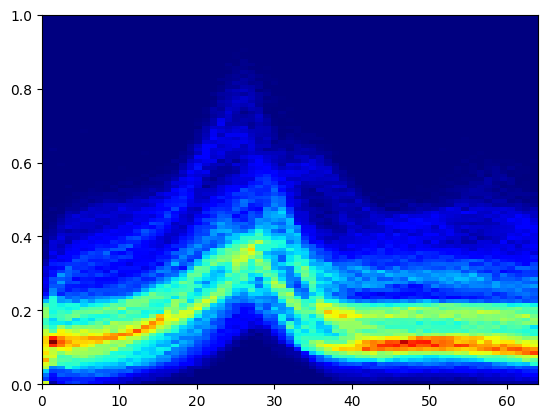

In [20]:
#Plot histogram of each case to see how ECG features are distributed

#Lets start with the normal ECG
normal = data_1.iloc[:, :-1].values
flatten_normal = normal[:,5:70].flatten() #Convert the list to 1D for histogram

norm_x = np.arange(0,65)
norm_ = np.tile(norm_x, normal.shape[0])

n =plt.hist2d(norm_, flatten_normal, bins=(65,100), cmap = plt.cm.jet)
plt.show()

#As you can see from this graph, Most normal ECG peak is between 20 and 30, lets check

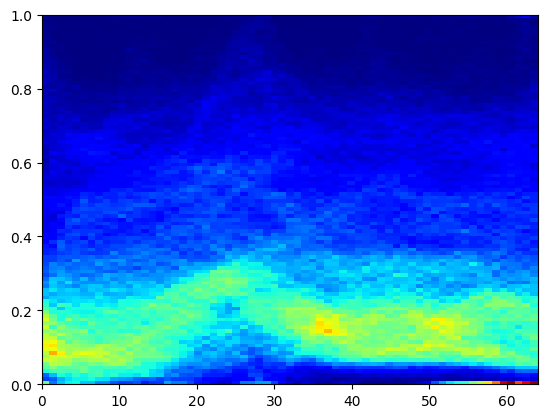

In [21]:
# Abnormal ECG

abnormal = data_2.iloc[:,:-1].values
flatten_abnormal = abnormal[:,5:70].flatten()

abnorm_x = np.arange(0,65)
abnorm_ = np.tile(abnorm_x, abnormal.shape[0])

ab = plt.hist2d(abnorm_, flatten_abnormal, bins = (65,100), cmap = plt.cm.jet)
plt.show()

#In this histogram, the abnormmal cases features are mostly distributed between 0 and 0.4

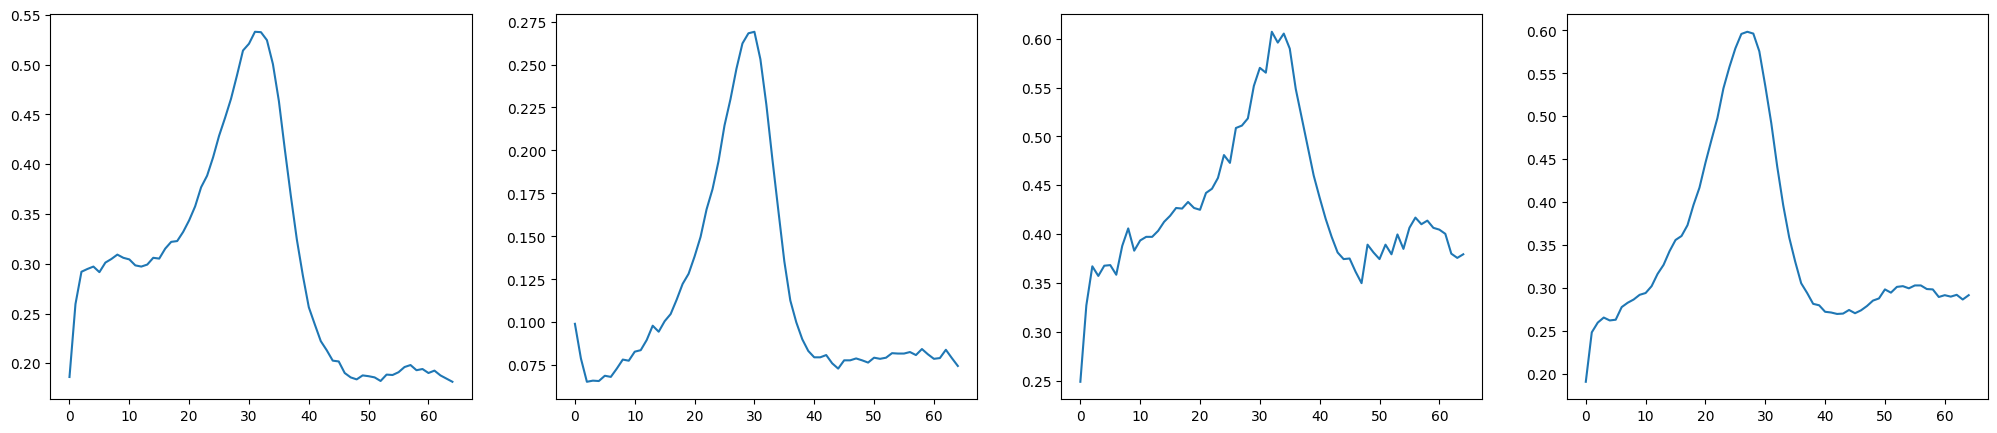

In [22]:
normal = data_1.iloc[:, :-1]
plt.subplots(1,4, figsize = (25,5))
plt.subplot(1,4,1)
plt.plot((normal.values)[200][5:70])
plt.subplot(1,4,2)
plt.plot((normal.values)[50][5:70])
plt.subplot(1,4,3)
plt.plot((normal.values)[20][5:70])
plt.subplot(1,4,4)
plt.plot((normal.values)[10][5:70])

#plots of Normal ECG signals, Peak is between 20 and 40

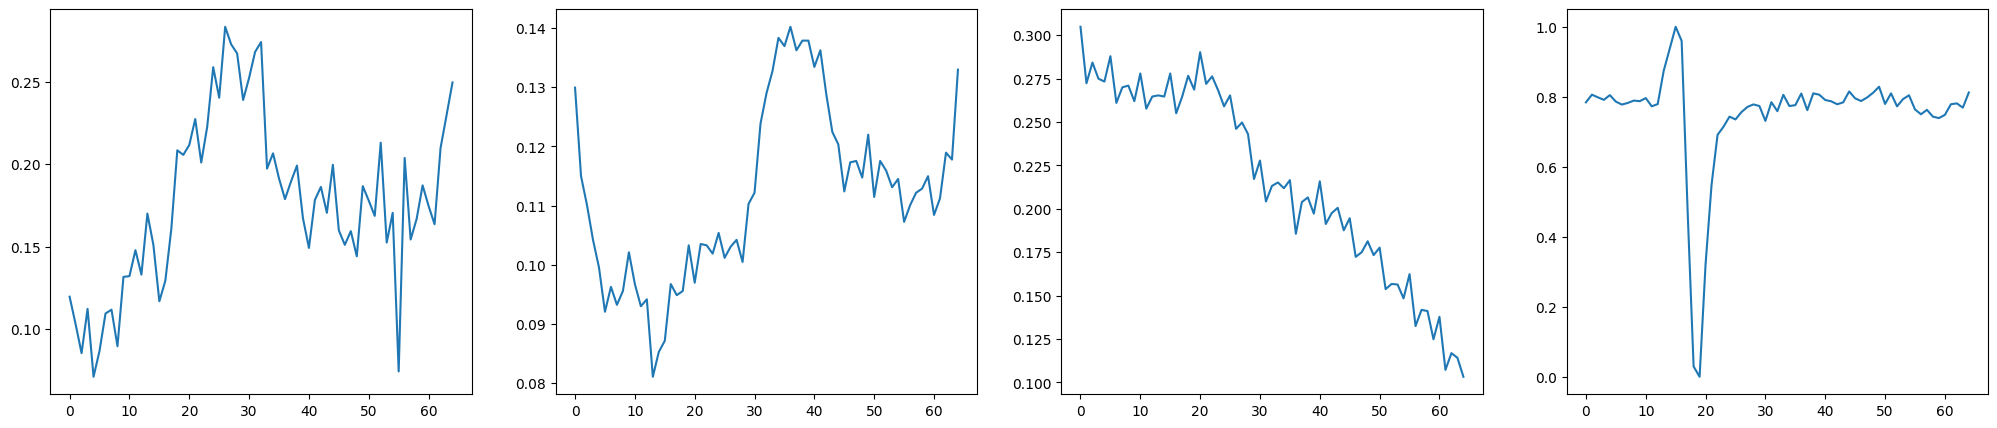

In [23]:
abnormal = data_2.iloc[:, :-1]
plt.subplots(1,4, figsize = (25,5))
plt.subplot(1,4,1)
plt.plot((abnormal.values)[200][5:70])
plt.subplot(1,4,2)
plt.plot((abnormal.values)[50][5:70])
plt.subplot(1,4,3)
plt.plot((abnormal.values)[20][5:70])
plt.subplot(1,4,4)
plt.plot((abnormal.values)[10][5:70])

#plots of Abnormal ECG signals, as you can see, it has no constant peek. each signal has slightly to huge difference between the other, unlike the normal ECG which showed that the peak is nearly the same in each.

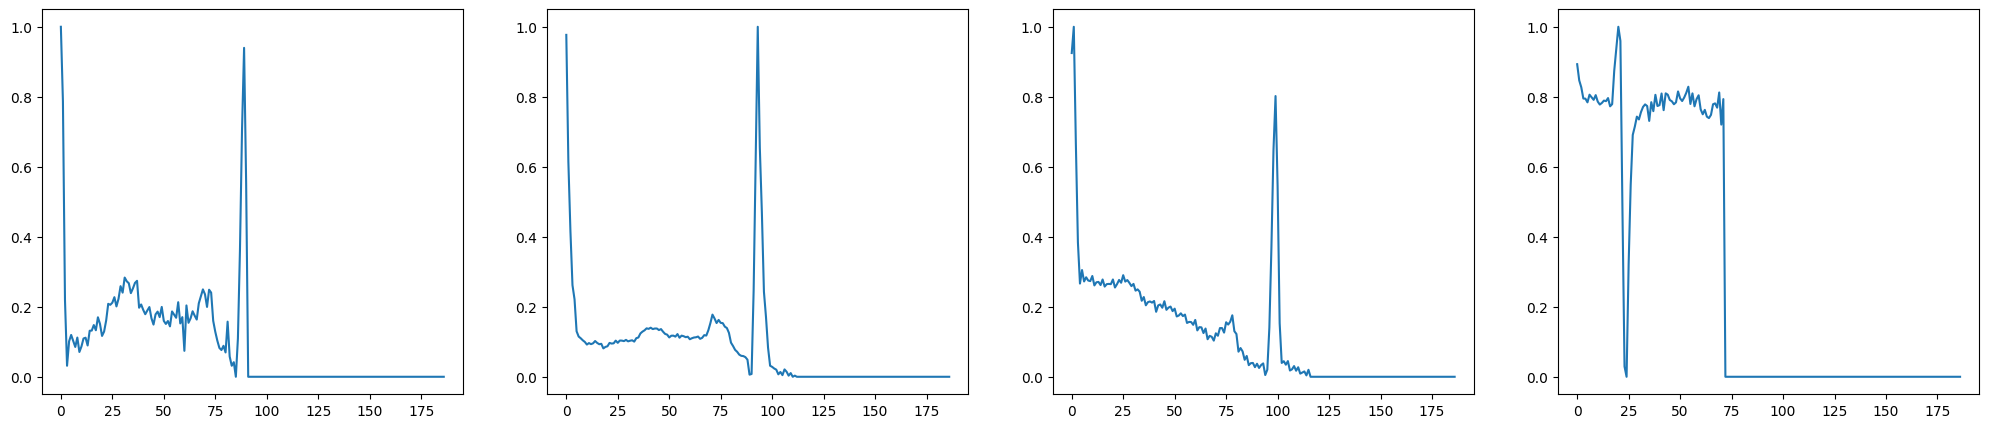

In [24]:
abnormal = data_2.iloc[:, :-1]
plt.subplots(1,4, figsize = (25,5))
plt.subplot(1,4,1)
plt.plot((abnormal.values)[200])
plt.subplot(1,4,2)
plt.plot((abnormal.values)[50])
plt.subplot(1,4,3)
plt.plot((abnormal.values)[20])
plt.subplot(1,4,4)
plt.plot((abnormal.values)[10])


In [25]:
data.rename(columns = {data.columns[-1] :"Label"}, inplace = True)
#The last column represents label, so lets change the name to label

<AxesSubplot: xlabel='Label', ylabel='count'>

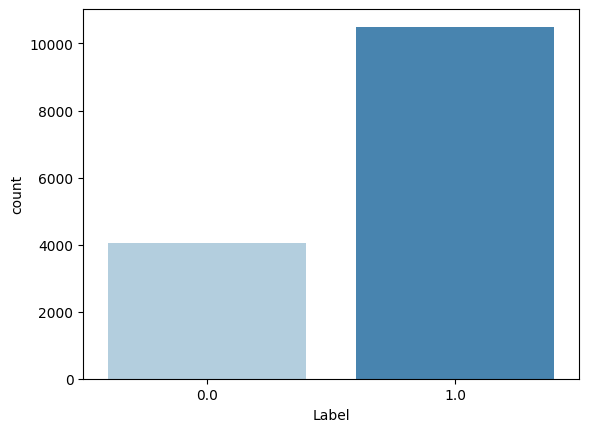

In [26]:

sns.countplot( x = data['Label'], palette= 'Blues') 


#The abnormal cases are more than normal, which is good for this type of data because we need to minimize the false predictions as much as we can, it's okay if a patient gets a false positive but it would be a huge problem if abnormal case is classified wrongly.

# EDA Conclusion

# As you might have figured out, this data represents ECG signals taken from patients with normal and abnormal heart conditions, The Normal beats show regular flow of the signals as shown while the abnormal shows irregularity in the signal

# In this kind of data, it's hard to visualize compared to a non numerical data as the previous ones we've worked on.

# But from the few graphs we can conclude the following
# -The Main difference between Normal ECG and Abnormal ECG is that Abnormal ECG has no specific flow while Normal has a flow and a peak between 20 and 40
# -The Abnormal ECG has no specific peak, the readings are random and irregular which reflects the irregular heartbeats
# -The data is more than balanced, which will help in the performance of ML and DL, without the need to use any of the over or undersampling techniques which is a plus
# -A huge number of readings contain 0 values in last few features, which we can delete later and see if it increases the performance or not
# We'll First try using ML models and see what can give us an acceptable score, then we'll apply DL as this data is big enough for applying ANN

# splitting labeled data

In [27]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
x = data.drop(['Label'] ,axis = 1)
y = data['Label']

In [29]:
x

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10501    1.0
10502    1.0
10503    1.0
10504    1.0
10505    1.0
Name: Label, Length: 14545, dtype: float64

# Splitting the data to train and test

In [188]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 2) 



# We'll first try to see the performance without applying feature selection methods, and see if we can reduce number of features and get same or better score, then we'll apply DL and see if it gets any better

# Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter= 200)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy : ",round(accuracy_score(y_test, y_pred), 4))
print("Recall : ",round(recall_score(y_test, y_pred), 4))
print("Precision : ",round(precision_score(y_test, y_pred), 4))

#In this kind of data, the recall score is the one we should consider the most, the recaall in logistic regression is 0.91, which is not enough for tthis kind of data, we can try using other complex models and see if we can get the score any better by hypertuning


Accuracy :  0.8219
Recall :  0.9136
Precision :  0.8502


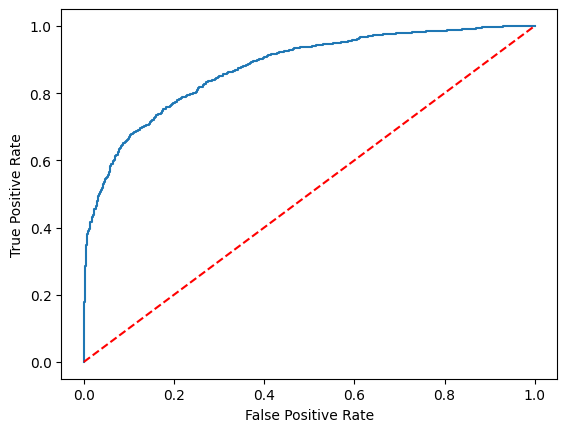

In [33]:
y_pred_proba = lr.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr)

plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
roc_auc #AUC Score

0.8749626452440804

In [35]:
#The logistic regression is not sufficient enough for this kind of data, as its not complex enough to handle a large and complexx data as this one, so let's try using other models

# KNearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred_log = knn.predict(x_test)

print("Accuracy : ",round(accuracy_score(y_test, y_pred_log), 4))
print("Recall : ",round(recall_score(y_test, y_pred_log), 4))
print("Precision : ",round(precision_score(y_test, y_pred_log), 4))

#The Knearest neighbor provided better results than logistic regression, lets try to hypertune its parameters to get better results

Accuracy :  0.9302
Recall :  0.9427
Precision :  0.9596


In [37]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' :[5,10,15,8], 'weights' : ('uniform', 'distance')}

grid = GridSearchCV(estimator = knn, param_grid = params, cv = 10)

grid.fit(x_train, y_train)

print(grid.best_params_)




{'n_neighbors': 5, 'weights': 'distance'}


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')

knn.fit(x_train, y_train)

y_pred_log = knn.predict(x_test)

print("Accuracy : ",round(accuracy_score(y_test, y_pred_log), 4))
print("Recall : ",round(recall_score(y_test, y_pred_log), 4))
print("Precision : ",round(precision_score(y_test, y_pred_log), 4))

#Slightly better after hypertuning

Accuracy :  0.9333
Recall :  0.9456
Precision :  0.9612


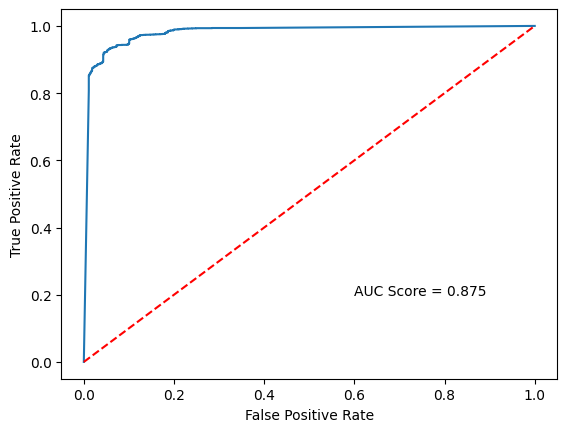

In [39]:
y_pred_proba_knn = knn.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_pred_proba_knn)
auc_knn = round(roc_auc_score(y_test, y_pred_proba), 3)

plt.plot(fpr_knn, tpr_knn)

plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.6, 0.2, f'AUC Score = {auc_knn}')
plt.show()

#Compared to logistic regression, the knn has a better recall score and better auc score as well.

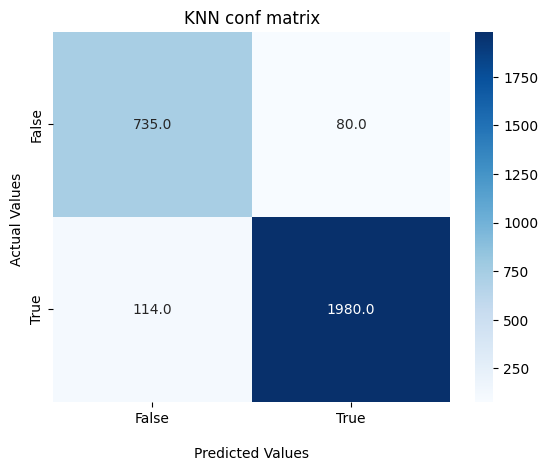

In [40]:
#Confusion matrix
mat_log = confusion_matrix(y_test, y_pred_log)

ax = sns.heatmap(mat_log, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('KNN conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    

#As you can see, There are 114 false negative, but we'll try to reduce this number as much as possible as it's a critical data and a false diagnosis would threaten lives

# SVM is one of the best models that most of the time gives good results, but the problem with this model is that it's not efficient on large datasets like this one, and would take hours to fit on the data, In this kind of data we would like to get good results in short time, and SVM won't serve us well for this, so we'll not use it

# Naive bayes is sometimes good in large datasets but i don't think it will give good performance on this kind of data because it makes every features independant on the other but the ECG signal features have high dependancy on each other so it will give very poor performance on this kind of data

In [41]:
#Let's get things more complex and try to apply random forest classification, which in my opinion i think it would give better results because it gets more complex, and has more hypertuning parameters which can help, 

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params = {'n_estimators' : [100,150,200], 'min_samples_split' : [2,4,6], 'max_depth' : ['Any', 100, 150]}

#grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = 100)

#grid_rf.fit(x_train, y_train)

#print(grid_rf.best_params_)

#{'max_depth': 150, 'min_samples_split': 2, 'n_estimators': 200} 

#I've commented the previous code after execution because it took a very long time , but here are the best parameters

In [43]:
#Now lets train and test

rf = RandomForestClassifier(n_estimators = 200, max_depth = 150, min_samples_split = 2)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Accuracy : ",round(accuracy_score(y_test, y_pred_rf), 4))
print("Recall : ",round(recall_score(y_test, y_pred_rf), 4))
print("Precision : ",round(precision_score(y_test, y_pred_rf), 4))

#As you can see, the RandomForest had a huge leap in performance especially after hypertuning, with a stuning recall score of 0.98 , but we will try to get it even better.

Accuracy :  0.9708
Recall :  0.9871
Precision :  0.9727


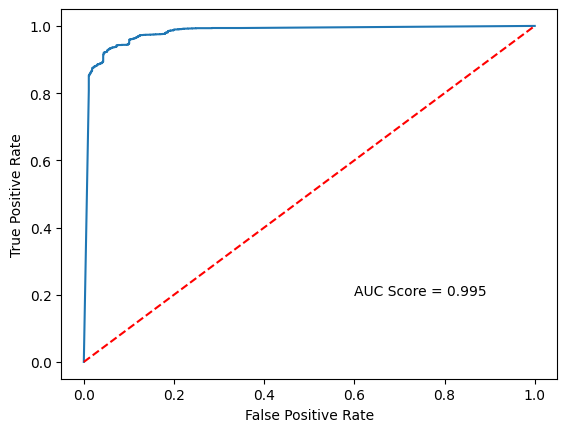

In [44]:
y_pred_proba_rf = rf.predict_proba(x_test)[:,1]

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_pred_proba_rf)
auc_rf = round(roc_auc_score(y_test, y_pred_proba_rf), 3)

plt.plot(fpr_knn, tpr_knn)

plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.6, 0.2, f'AUC Score = {auc_rf}')
plt.show()

#Random Forest classifier has an AUC score of 0.995 which is the best until now

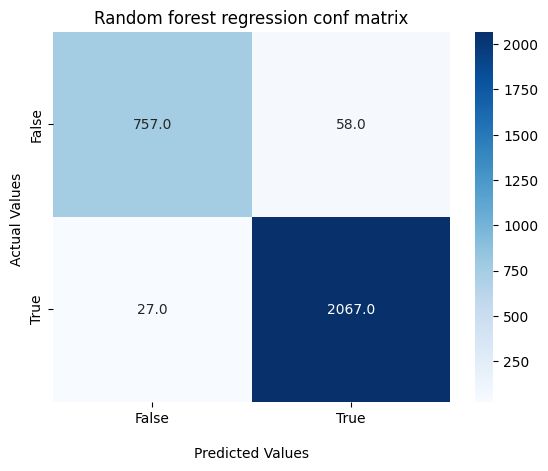

In [45]:
#Confusion matrix
mat_rf = confusion_matrix(y_test, y_pred_rf)

ax = sns.heatmap(mat_rf, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('Random forest regression conf matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    

#The number of false negative has got even better than last model, which is 26 only.

# XGBoost classifier

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

params = {'max_depth' : [None, 3, 5,6,8],
          'n_estimators' : [100,150,200,250]
          }


grid = GridSearchCV(xgb, param_grid = params, cv = 100)

grid.fit(x_train , y_train)

print(grid.best_params_)


KeyboardInterrupt: 

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200, max_depth = 12)

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)


print("Accuracy : ",round(accuracy_score(y_test, y_pred_xgb), 4))
print("Recall : ",round(recall_score(y_test, y_pred_xgb), 4))
print("Precision : ",round(precision_score(y_test, y_pred_xgb), 4))

#XGBoost has even better results that RF with a recall score of 0.9914


Accuracy :  0.9807
Recall :  0.9914
Precision :  0.982


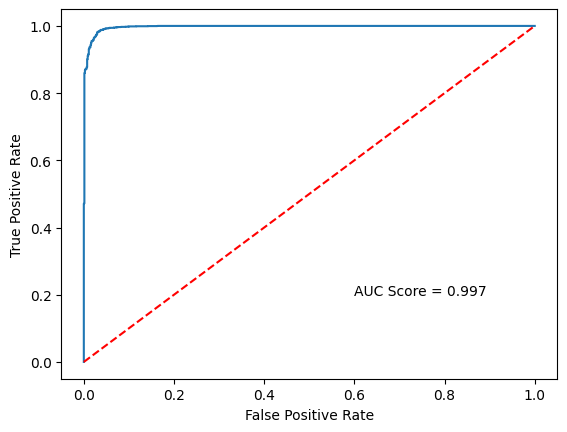

In [53]:
y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = round(roc_auc_score(y_test, y_pred_proba_xgb), 3)

plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.6, 0.2, f'AUC Score = {auc_xgb}')
plt.show()

#XGB has an AUC score of 0.997 which is better than random forest

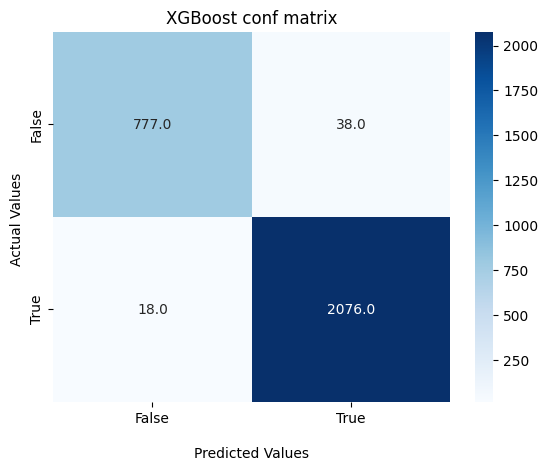

In [54]:
#Confusion matrix
mat_xgb = confusion_matrix(y_test, y_pred_xgb)

ax = sns.heatmap(mat_xgb, annot=True, cmap='Blues', fmt=".1f")

ax.set_title('XGBoost conf matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    

#The number of false negative has got even better than last model, which is 18 only.

# As you saw throughout the ML phase, as we proeceeded with more complex models and more complex hypertuning, we got better results, which reflects the importance of increasing the complexity on this kind of data. In DL it gets even more complex which will surely increase the performance and decrease the false negative numbers even more, in this data the accuracy is surely important but not as recall as we have discussed earlier

Text(0.5, 1.0, 'KNN Classifier')

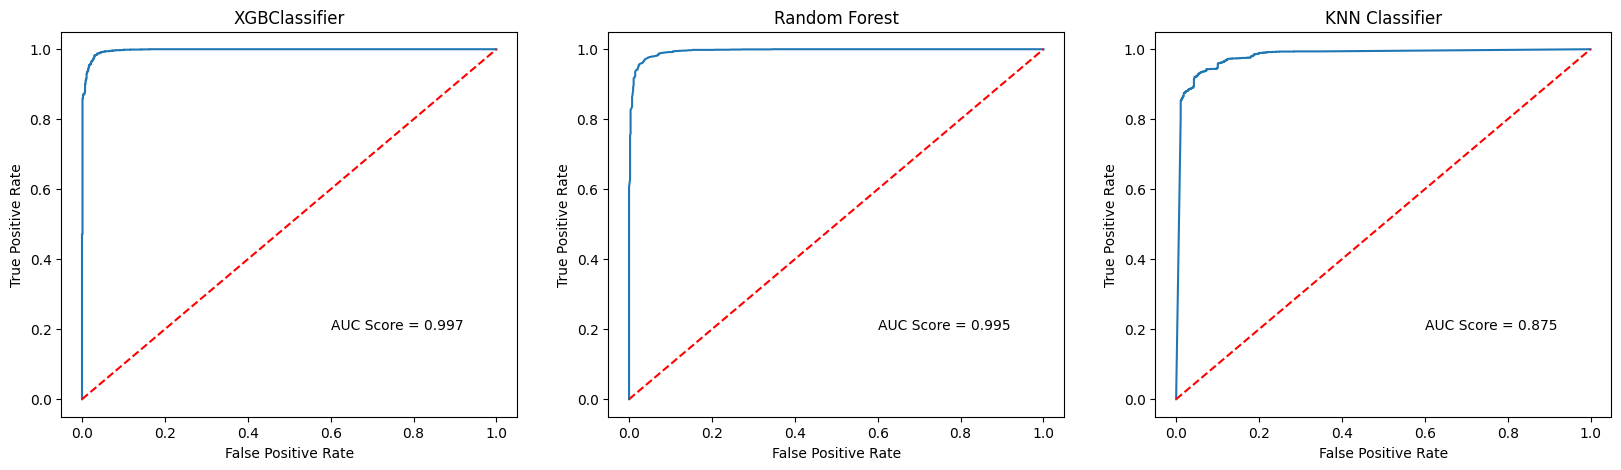

In [66]:
plt.subplots(1,3, figsize = (20,5))
plt.subplot(1,3,1)
plt.plot(fpr_xgb, tpr_xgb)
plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.6, 0.2, f'AUC Score = {auc_xgb}')
plt.title('XGBClassifier')

plt.subplot(1,3,2)
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.6, 0.2, f'AUC Score = {auc_rf}')
plt.title('Random Forest')

plt.subplot(1,3,3)
plt.plot(fpr_knn, tpr_knn)
plt.plot([0, 1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.6, 0.2, f'AUC Score = {auc_knn}')
plt.title('KNN Classifier')



# The above graph has the best 3 models we used, we didn't bother to use other models as we discussed because they would just give bad performance on this kind of data, we can conclude that XGBoost has the best performance with AUC score of 0.997, Recall score = 0.9914

# Now we can try to apply feature selection techniques and test if it gives us the same or better performance

# PCA

In [68]:
# we need to standarize the data first before using PCA

In [69]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_scaled = scalar.fit_transform(x)

In [104]:
from sklearn.decomposition import PCA

pca = PCA(0.94) #choose minimum number of components such that 94% of variance is retained

In [105]:
x_pca = pca.fit_transform(x_scaled)

In [106]:
#Now we can split the data first then apply the high performance models and see if it makes any difference

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 2)

In [109]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200, max_depth = 12)

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)


print("Accuracy : ",round(accuracy_score(y_test, y_pred_xgb), 4))
print("Recall : ",round(recall_score(y_test, y_pred_xgb), 4))
print("Precision : ",round(precision_score(y_test, y_pred_xgb), 4))

#XGBoost has even better results that RF with a recall score of 0.9914


Accuracy :  0.9522
Recall :  0.9704
Precision :  0.9635


# By using PCA , we managed to get a recall of 0.9704, although we managed to decrease the dimension of the data, but 2% lower performance is considered critical in this kind of data

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Data doesn't have to be normalized before using ANOVA

#select feature with best ANOVA F-Values
#Create an selectKbest to select features with best ANOVA values
fvalue_selector = SelectKBest(f_classif, k = 100)
x_kbest = fvalue_selector.fit_transform(x,y)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [186] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [135]:
#Now we can split the data first then apply the high performance models and see if it makes any difference

x_train, x_test, y_train, y_test = train_test_split(x_kbest, y, test_size = 0.2, random_state = 2)

In [136]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200, max_depth = 12)

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)


print("Accuracy : ",round(accuracy_score(y_test, y_pred_xgb), 4))
print("Recall : ",round(recall_score(y_test, y_pred_xgb), 4))
print("Precision : ",round(precision_score(y_test, y_pred_xgb), 4))

#XGBoost has even better results that RF with a recall score of 0.9914


Accuracy :  0.9691
Recall :  0.9895
Precision :  0.9682


In [137]:
x_kbest.shape 

(14545, 100)

# By using ANOVA, we managed to reduce the dimension of x to 100 features only, and get a score of 0.989 recall, and if we slightly increase the number of features we would get nearly the same score as without using any feature selection methods, Without the feature selection method we had 187 features, so we reduced nearly half the number and still got good scores

# ML Conclusion
# -XGBoost have best performance with 0.997 recall score
# -The more complex models get the better the performance
# -By using ANOVA, we managed to decrease more than 80 features and still get good performance
# - Applying DL techniques would allow us to get better performance as it gets more complex and can handle large datasets

# DeepLearning

In [141]:
x.shape

(14545, 187)

In [180]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [189]:
model = Sequential([
    Dense(64, activation = 'relu',input_shape=(187,)),
    #add a layer with 20 neurons
    Dense(32, activation  = 'relu'),
    #Normalize data
    BatchNormalization(),
    #add a layer with 20 neurons
    Dense(32, activation  = 'relu'),
    #add a layer with 20 neurons
    Dense(16, activation  = 'relu'),
    #add a layer with 20 neurons
    Dense(1, activation = 'sigmoid') #use activation as sigmoid because it categorical data
])

In [190]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                12032     
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                      

In [191]:
#Early stop that monitors recall score
early_stop = EarlyStopping(monitor = 'val_Recall', patience = 10, restore_best_weights = True)


In [192]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=[keras.metrics.Recall(name = 'Recall')])

In [194]:
model.fit(x_train, y_train, epochs = 300,callbacks=early_stop, validation_data = ((x_test, y_test)), batch_size = 10 )

Epoch 1/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0228 - Recall: 0.9958 - val_loss: 0.1187 - val_Recall: 0.9771
Epoch 2/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0299 - Recall: 0.9950 - val_loss: 0.1033 - val_Recall: 0.9857
Epoch 3/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0360 - Recall: 0.9914 - val_loss: 0.1029 - val_Recall: 0.9862
Epoch 4/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0245 - Recall: 0.9952 - val_loss: 0.0894 - val_Recall: 0.9876
Epoch 5/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0258 - Recall: 0.9948 - val_loss: 0.0926 - val_Recall: 0.9828
Epoch 6/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0271 - Recall: 0.9945 - val_loss: 0.0970 - val_Recall: 0.9785
Epoch 7/300
1164/1164 [==============================] - 1s 1ms/step - loss: 0.0209 - Recall: 0.9960 - val_loss: 0.1065 - val_Recall: 0.9809
Epoch 8/300
1

# In this Dense model, we managed to get a recall score of 0.9957, which is better than what we got in Machine learning, with more hypertuning it can get better but overfitting can occur, this is why i used Early stopping inorder to avoid overfitting

# We managed to get a Recall score of 0.9914 in ML and 0.9957 in DL